In [19]:
import numpy as np 
import sunpy 
import sunpy.map # import separately
import astropy.units as u
from astropy.coordinates import SkyCoord

In [2]:
a = 1

In [3]:
a = 2

In [4]:
print(a)

2


In [5]:
smap = sunpy.map.Map("./data/solo_L2_eui-fsi174-image_20240912T000045277_V01.fits")

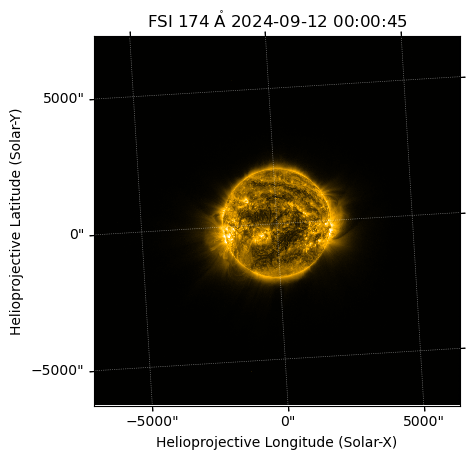

In [6]:
smap.plot()

In [8]:
smap.data.shape # (ny, nx)

(3072, 3040)

In [9]:
smap_crop = smap.submap(bottom_left=(1000,1000)*u.pix,
                        top_right=(2000,2000)*u.pix)

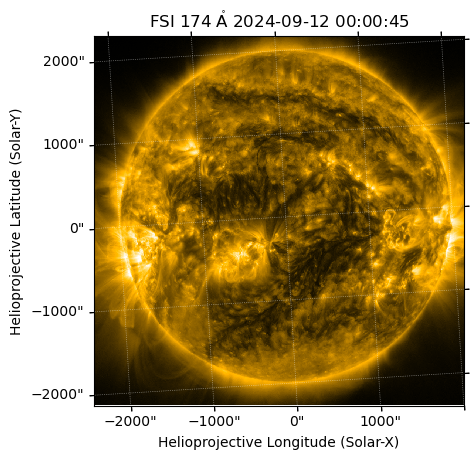

In [10]:
smap_crop.plot()

In [11]:
smap_crop.data.shape

(1001, 1001)

In [13]:
smap_array = smap.data # get the array 

In [14]:
smap_array_crop = smap_array[1000:2000,1000:2000]

In [15]:
smap_array_crop.shape

(1000, 1000)

In [17]:
smap_crop_arcsec_wrong = smap.submap(
    bottom_left=(-1000,-1000)*u.arcsec,
    top_right=(1000,1000)*u.arcsec
)

# this is wrong because we don't know which coordinate frame the arcsec is in 

TypeError: When bottom_left is a Quantity, top_right must be a Quantity in units of pixels.

In [18]:
# smap has a coordinate frame 

smap.coordinate_frame

<Helioprojective Frame (obstime=2024-09-12T00:00:50.277, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2024-09-12T00:00:50.277, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
    (177.40842211, -6.93032629, 7.26155964e+10)>)>

In [21]:
coord_test = SkyCoord(100*u.arcsec,100*u.arcsec)

In [22]:
coord_test

<SkyCoord (ICRS): (ra, dec) in deg
    (0.02777778, 0.02777778)>

In [23]:
coord_bottom_left = SkyCoord(
    -1000*u.arcsec,
    -1000*u.arcsec,
    frame=smap.coordinate_frame
)

In [24]:
coord_bottom_left

<SkyCoord (Helioprojective: obstime=2024-09-12T00:00:50.277, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2024-09-12T00:00:50.277, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
    (177.40842211, -6.93032629, 7.26155964e+10)>): (Tx, Ty) in arcsec
    (-1000., -1000.)>

In [28]:
coord_top_right = SkyCoord(
    500*u.arcsec,
    1000*u.arcsec,
    frame=smap.coordinate_frame
)

In [29]:
# now it is correct 

smap_crop_arcsec = smap.submap(
    bottom_left=coord_bottom_left,
    top_right=coord_top_right
)

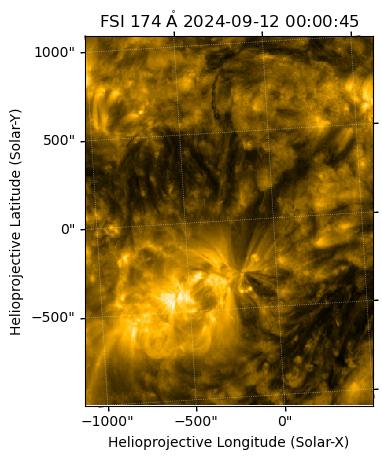

In [30]:
smap_crop_arcsec.plot()

In [31]:
smap_crop_arcsec.bottom_left_coord

<SkyCoord (Helioprojective: obstime=2024-09-12T00:00:50.277, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2024-09-12T00:00:50.277, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
    (177.40842211, -6.93032629, 7.26155964e+10)>): (Tx, Ty) in arcsec
    (-1124.02385993, -991.98623874)>

In [40]:
smap_crop_arcsec.meta["crpix1"]

np.float64(257.5)

In [38]:
smap.meta["crpix1"]

1536.5

In [42]:
# rotate the solar north to up 

smap_rotate = smap.rotate(missing=0) # smap.rotate(100*u.deg) will rotate the image by 100 deg 

In [47]:
smap_fix = sunpy.map.Map(smap.data.astype(np.float64), smap.meta)  # sometimes the data type causes bug in rotation, 
                                                                   # convert to np.float64 to avoid that 

In [45]:
smap_rotate = smap_fix.rotate()

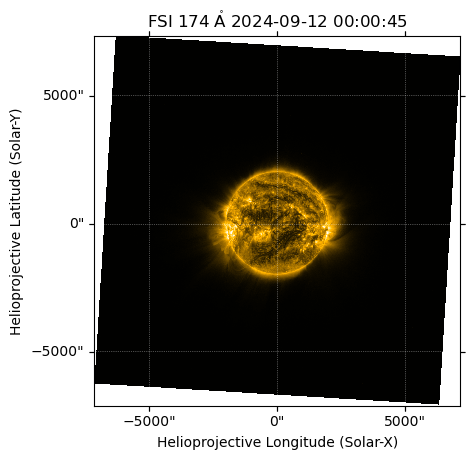

In [46]:
smap_rotate.plot()